<a href="https://colab.research.google.com/github/youngbinwoo/Kaggle/blob/master/Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(Kaggle)Titanic:Machine Learning from Disaster
## contents 


*   Definition the problem
*  Exploratory data analysis(EDA)
*   Modelling
*  Submmision

##1)Definition the problem

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)


*  [출처: https://www.kaggle.com/c/titanic/overview ]
*  [참조: https://www.kaggle.com/ash316/eda-to-prediction-dietanic]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

##2) Exploratory data analysis(EDA)


*   PassengerId

*   Survived : survuved(1), no(0)

*  Pclass: Ticket class 1 = 1st, Ticket class 2 = 2st, Ticket class 3 = 3st

*   
Name

*   Sex

*   Age

*    SibSp: 함께 탑승한 자녀 / 배우자 의 수
*  Parch: 함께 탑승한 부모님 / 아이들 의 수


*   Ticket


* Fare


*   Cabin


*   
Embarked: C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train_test = [train, test]

##2-1) Visualization 

In [0]:
#시각화하기
def pie_chart(feature):
  feature_ratio = train[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index 
  survived = train[train['Survived'] == 1][feature].value_counts() 
  dead = train[train['Survived'] == 0][feature].value_counts()
  
  plt.plot(aspect='auto') 
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%') 
  plt.title(feature + '\'s ratio in total') 
  plt.show() 
  
  for i, index in enumerate(feature_index): 
    plt.subplot(1, feature_size + 1, i + 1, aspect='equal') 
    plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%') 
    plt.title(str(index) + '\'s ratio') 
    plt.show()

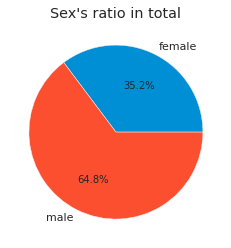

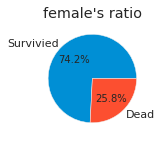

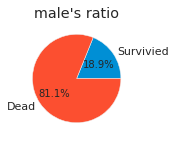

In [14]:
#남자가 여자보다 Survived한 비율이 적다 -> 성별 유의미
pie_chart('Sex') 

In [15]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

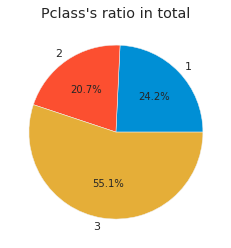

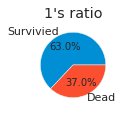

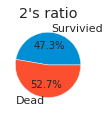

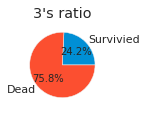

In [16]:
#Survived 비율 1등석>2등석>3등석
pie_chart('Pclass')

In [17]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

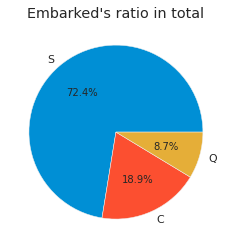

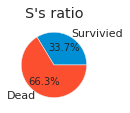

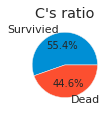

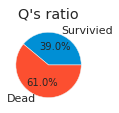

In [18]:
#Embarked의 위치와 Survived : C>Q>S 상식적으로 Survived와 상관관계가 있는지는 모르겠다
pie_chart('Embarked')

In [19]:
train.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [0]:
#SibSp는 pie 형태보단 bar 형태가 나을듯 하다
def bar_chart(feature): 
  survived = train[train['Survived']==1][feature].value_counts() 
  dead = train[train['Survived']==0][feature].value_counts() 
  df = pd.DataFrame([survived,dead]) 
  df.index = ['Survived','Dead'] 
  df.plot(kind='bar',stacked=True, figsize=(10,5))

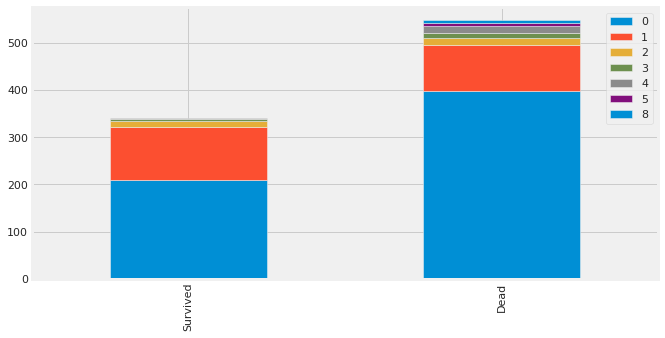

In [21]:
# 함께 탑승한 자녀 / 배우자 의 수가 0명일수록 Survivied가 적다.
bar_chart("SibSp")

In [22]:
train.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

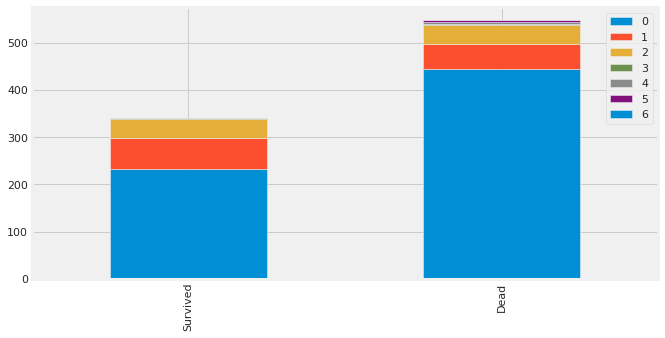

In [23]:
#함께 탑승한 부모 / 아이들의 수  0명일수록 Survivied가 적다.
bar_chart("Parch")

In [24]:
train.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

##2-2) 전처리 (문자열->숫자, NaN값 채우기, 범주화..)


In [25]:
#이름 전처리(성이 결혼 여부 등을 알려주기 때문에 성만 남기기)
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [26]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)
test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [0]:
train['Name'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train['Name'].unique()
test['Name'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test_titles = test['Name'].unique()

In [0]:
#Age NaN값 채우기(남자,여자로 grouping 하고, 그에 따르게 NaN값 채우기)
train['Age'].fillna(-1, inplace=True)
test['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train.Age[(train["Age"] != -1) & (train['Name'] == title)].median()
    medians[title] = median

In [29]:
#Sex를 female 1, male 0으로 변환
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
#Embarked의 NaN값 대체
train['Embarked'].fillna('S',inplace=True)
from sklearn.preprocessing import LabelEncoder
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,0


In [31]:
#Age 범주화
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,2
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1,2
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,0,2


In [32]:
test['Age_band']=0
test.loc[test['Age']<=16,'Age_band']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_band']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_band']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_band']=3
test.loc[test['Age']>64,'Age_band']=4
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,1,0,2
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,2,1,2
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,1,0,3
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,2,0,1
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,2,1,1


In [0]:
#Parch와 SibSp를 합쳐서 Family_Size만들기, family size=0은 passenger혼자 탄 경우, 1은 가족이 있는 경우
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']

In [34]:
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']
Dad = (train['Family_Size'] > 4) & (train['Sex'] == 1)
train['m_Dad'] = 1
train.loc[Dad,'m_Dad'] = 0
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,m_Dad
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.25,NaN,2,0,1,1,1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,m_Dad
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.25,NaN,2,0,1,1,1


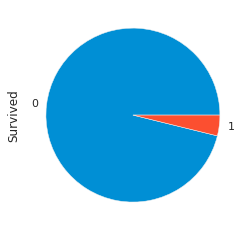

In [35]:
ax2 = train.Survived[train['m_Dad'] == 0].value_counts().plot(kind='pie')
#가장이라고 추측되는 인물의 Survivied 비율이 훨씬 높음-> 의미있는 변수 같음
train.head(1)

In [36]:
test['Family_Size']=0
test['Family_Size']=test['Parch']+test['SibSp']
Dad = (test['Family_Size'] > 4) & (test['Sex'] == 1)
test['m_Dad'] = 1
test.loc[Dad,'m_Dad'] = 0
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,m_Dad
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,1,0,2,0,1


In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
Age_band         0
Family_Size      0
m_Dad            0
dtype: int64

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Initial          0
Age_band         0
Family_Size      0
m_Dad            0
dtype: int64

In [39]:
#Fare 범주화
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,m_Dad,Fare_cat
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,2,1,1,3
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,1,0,1,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1,2,1,1,3
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,0,2,0,1,1


In [40]:
test['Fare_cat']=0
test.loc[test['Fare']<=7.91,'Fare_cat']=0
test.loc[(test['Fare']>7.91)&(test['Fare']<=14.454),'Fare_cat']=1
test.loc[(test['Fare']>14.454)&(test['Fare']<=31),'Fare_cat']=2
test.loc[(test['Fare']>31)&(test['Fare']<=513),'Fare_cat']=3
test.head(5)['Fare_cat']=0
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,m_Dad,Fare_cat
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,1,0,2,0,1,0
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,2,1,2,1,1,0
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,1,0,3,0,1,0
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,2,0,1,0,1,0
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,2,1,1,2,1,0


In [41]:
#Pclass 전처리
from sklearn.preprocessing import LabelEncoder
train['Pclass'] = LabelEncoder().fit_transform(train['Pclass'])
test['Pclass'] = LabelEncoder().fit_transform(test['Pclass'])
train.head(3) #1->0, 2->1, 3->2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,m_Dad,Fare_cat
0,1,0,2,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,1,1,0
1,2,1,0,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,2,1,1,3
2,3,1,2,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,1,0,1,1


In [42]:
train.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','SibSp','Parch'],axis=1,inplace=True)
train.head(1)

,Survived,Pclass,Sex,Embarked,Initial,Age_band,Family_Size,m_Dad,Fare_cat
0,0,2,1,2,0,1,1,1,0


In [0]:
test.drop(['Name','Age','Ticket','Fare','Cabin','SibSp','Parch'],axis=1,inplace=True)

In [44]:
test.head()

,PassengerId,Pclass,Sex,Embarked,Initial,Age_band,Family_Size,m_Dad,Fare_cat
0,892,2,1,1,0,2,0,1,0
1,893,2,0,2,1,2,1,1,0
2,894,1,1,1,0,3,0,1,0
3,895,2,1,2,0,1,0,1,0
4,896,2,0,2,1,1,2,1,0


##Modeling


In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

##Random Forest


In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [62]:
random_forest.score(X_train, Y_train)

0.8888888888888888

In [0]:
submission = pd.DataFrame({

        "PassengerId": test["PassengerId"],

        "Survived": Y_pred

    })

submission.to_csv('submision1.csv', index=False)

##K-fold Cross Validation

In [64]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
prediction = clf.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
 
submission.to_csv('submission2.csv', index=False)

## KNN

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [0]:
submission = pd.DataFrame({

        "PassengerId": test["PassengerId"],

        "Survived": Y_pred

    })

submission.to_csv('submision3.csv', index=False)

## Gaussian Naive Bayes

In [0]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

In [0]:
submission = pd.DataFrame({

        "PassengerId": test["PassengerId"],

        "Survived": Y_pred

    })

submission.to_csv('submision4.csv', index=False)

##3) submission 성공
*   Random Forest 74.162%
*   K-fold Cross Validation 77.033%
*   KNN 71.770%
*   Gaussian Naive Bayes 67.464%
